20/20 [==============================] - 0s 5ms/step
Test loss
1.7701799869537354
Test accuracy
0.6000000238418579
roc_auc_score
0.8370982142857143
Train on 162 samples, validate on 18 samples
Epoch 1/70
162/162 [==============================] - 1s 6ms/step - loss: 0.1846 - acc: 0.9321 - val_loss: 1.8865 - val_acc: 0.6111

Epoch 00001: val_acc improved from -inf to 0.61111, saving model to weights_cnn_best3.h5
Epoch 2/70
162/162 [==============================] - 1s 4ms/step - loss: 0.1122 - acc: 0.9568 - val_loss: 2.0445 - val_acc: 0.6667

Epoch 00002: val_acc improved from 0.61111 to 0.66667, saving model to weights_cnn_best3.h5
Epoch 3/70
162/162 [==============================] - 1s 4ms/step - loss: 0.1224 - acc: 0.9630 - val_loss: 2.7899 - val_acc: 0.5556

Epoch 00003: val_acc did not improve from 0.66667
Epoch 4/70
162/162 [==============================] - 1s 4ms/step - loss: 0.0725 - acc: 0.9815 - val_loss: 2.4095 - val_acc: 0.6111

Epoch 00004: val_acc did not improve from 0.

162/162 [==============================] - 1s 4ms/step - loss: 0.1718 - acc: 0.9630 - val_loss: 2.3440 - val_acc: 0.5000

Epoch 00044: val_acc did not improve from 0.72222
Epoch 45/70
162/162 [==============================] - 1s 4ms/step - loss: 0.1621 - acc: 0.9321 - val_loss: 1.8564 - val_acc: 0.5556

Epoch 00045: val_acc did not improve from 0.72222
Epoch 46/70
162/162 [==============================] - 1s 4ms/step - loss: 0.0770 - acc: 0.9691 - val_loss: 2.4515 - val_acc: 0.5556

Epoch 00046: val_acc did not improve from 0.72222
Epoch 47/70
162/162 [==============================] - 1s 4ms/step - loss: 0.1313 - acc: 0.9444 - val_loss: 1.7653 - val_acc: 0.5556

Epoch 00047: val_acc did not improve from 0.72222
Epoch 48/70
162/162 [==============================] - 1s 4ms/step - loss: 0.0963 - acc: 0.9753 - val_loss: 2.1138 - val_acc: 0.6111

Epoch 00048: val_acc did not improve from 0.72222
Epoch 49/70
162/162 [==============================] - 1s 5ms/step - loss: 0.0620 - acc: 0.9

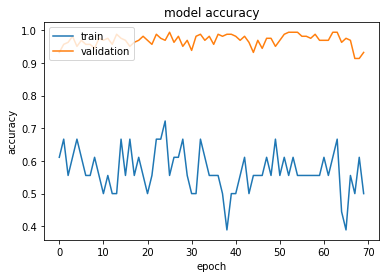

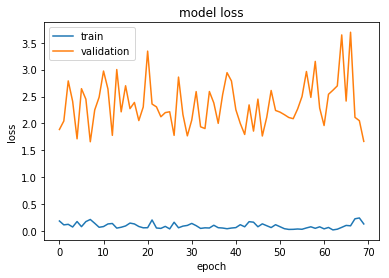

{0: 0.78}
{0: 0.78, 1: 0.9761904761904763}
{0: 0.78, 1: 0.9761904761904763, 2: 0.9296875}


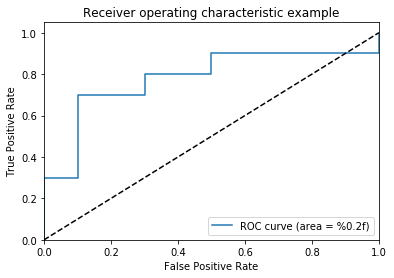

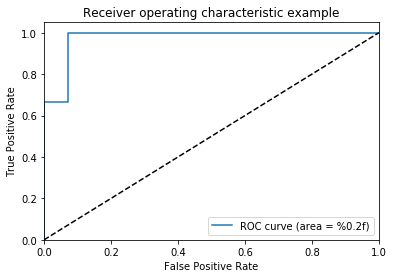

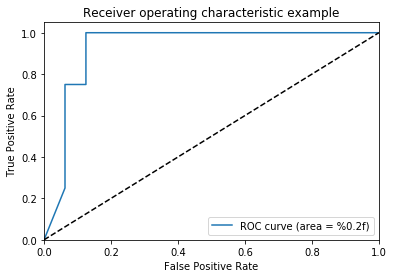

In [5]:
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED']='0'
#setting the seed nupy generator random number
np.random.seed(3)
#setting the seed for python random numbers
rn.seed(4)
#setting the seed for tensorflow
tf.set_random_seed(5)
from keras import backend as k

#force tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.set_session(sess)


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time


NAME = "CNN-kaggel-dataset-50epochs-2dropout-4cov2d-x200-30%split-184_42_64-7x7-no-dense"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))




pickle_in = open("X2.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y2.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

# keras part .............

# Generate dummy data
#import numpy as np
#data = np.random.random((1000, 100))
#labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)

# Train the model, iterating on the data in batches of 32 samples
#model.fit(data, one_hot_labels, epochs=10, batch_size=32)

#end keras part...........


model = Sequential()

model.add(Conv2D(184, (5, 5), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(4, 4)))


model.add(Conv2D(100, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))

model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
X_train, X_test, y_train, y_test = train_test_split(X,one_hot_labels,test_size=0.1,shuffle=False)

#history=model.fit(X, one_hot_labels, batch_size=32, epochs=50, validation_split=0.3,callbacks=[tensorboard])
#model.evaluate_
''''model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
X_train, X_test, y_train, y_test = train_test_split(X,one_hot_labels,test_size=0.1,shuffle=False)

#cb = [ModelCheckpoint("weights.h5", save_best_only=True, save_weights_only=True)]
cb= ModelCheckpoint(filepath='weights_cnn.h5',  verbose=1, monitor='val_loss', save_best_only=True, save_weights_only=True)

history=model.fit(X_train, y_train,
                      batch_size=10,
                      epochs=70,
                      validation_split=0.1,
                      shuffle=True,
                      callbacks=[cb]
                     )'''

'''model.load_weights('weights_cnn6.h5')
score, acc=model.evaluate( X_test, y_test)
print(score)
print(acc)

score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)



model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
X_train, X_test, y_train, y_test = train_test_split(X,one_hot_labels,test_size=0.1,shuffle=False)
model.load_weights('weights_cnn_best.h5')'''



model.load_weights('weights_cnn_best.h5')

score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)

#cb = [ModelCheckpoint("weights.h5", save_best_only=True, save_weights_only=True)]
cb= ModelCheckpoint(filepath='weights_cnn_best3.h5',  verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)

history=model.fit(X_train, y_train,
                      batch_size=10,
                      epochs=70,
                      validation_split=0.1,
                      shuffle=True,
                      callbacks=[cb]
                     )
                     
#model.load_weights('weights_cnn6.h5')

score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)


#score,acc=model.evaluate(X)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()


